In [1]:
import numpy as np
import pandas as pd
import os, sys
from IPython.display import display

from pycaret.utils import version

In [2]:
train = pd.read_csv('Il_10_AAC_SMOTE.csv')

In [3]:
from pycaret.classification import *

In [4]:
train.head()

,Class,A,C,E,D,G,F,I,H,K,M,L,N,Q,P,S,R,T,W,V,Y
0,1,0.0,0.0,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.999997,1.000000,0.999997,1.0,0.999997,0.999997,0.999997,0.0,0.0
2,1,0.0,0.0,1.0,1.0,0.999993,0.999993,1.0,0.0,0.0,0.0,1.0,0.000000,0.999993,0.000000,0.0,0.999993,0.000000,0.000000,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.0,0.0
4,1,1.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.0,0.0


In [5]:
clf1 = setup (data = train,
             target = 'Class',  train_size = 0.80, feature_selection = True, feature_selection_threshold= 0.9, feature_selection_method= 'classic',  fold =5, data_split_stratify = True, session_id=123, log_experiment=True, experiment_name='il-10_transformd_Azure')

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1636, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2021/08/06 21:57:26 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8654,0.9273,0.8429,0.8751,0.8582,0.7302,0.7314,0.1940
xgboost,Extreme Gradient Boosting,0.8631,0.9170,0.8429,0.8716,0.8562,0.7257,0.7272,0.1080
catboost,CatBoost Classifier,0.8608,0.9203,0.8476,0.8633,0.8548,0.7212,0.7221,0.8580
lightgbm,Light Gradient Boosting Machine,0.8532,0.9185,0.8333,0.8591,0.8457,0.7057,0.7065,0.1420
gbc,Gradient Boosting Classifier,0.8524,0.9051,0.8238,0.8657,0.8434,0.7040,0.7059,0.0420
et,Extra Trees Classifier,0.8226,0.9060,0.7825,0.8414,0.8097,0.6440,0.6471,0.1820
ada,Ada Boost Classifier,0.8165,0.8811,0.7794,0.8313,0.8039,0.6317,0.6337,0.0300
dt,Decision Tree Classifier,0.7454,0.7455,0.7302,0.7395,0.7337,0.4899,0.4912,0.0080
knn,K Neighbors Classifier,0.7423,0.8169,0.8127,0.7008,0.7524,0.4869,0.4930,0.3560
qda,Quadratic Discriminant Analysis,0.7026,0.7888,0.6746,0.7001,0.6860,0.4037,0.4051,0.0100


In [7]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8740,0.9344,0.8254,0.9043,0.8631,0.7469,0.7496
1,0.8435,0.9121,0.8254,0.8455,0.8353,0.6863,0.6865
2,0.8740,0.9360,0.8413,0.8908,0.8653,0.7472,0.7483
3,0.8391,0.9102,0.8413,0.8281,0.8346,0.6779,0.6780
4,0.8352,0.8999,0.8333,0.8268,0.8300,0.6702,0.6702
Mean,0.8532,0.9185,0.8333,0.8591,0.8457,0.7057,0.7065
SD,0.0172,0.0143,0.0071,0.0324,0.0152,0.0341,0.0350


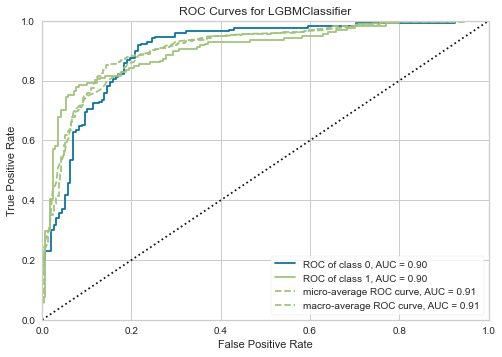

In [8]:
plot_model(estimator = lightgbm)

In [9]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8537,0.9028,0.7785,0.9044,0.8367,0.7055,0.7120


,E,N,G,F,H,Q,T,V,A,C,...,M,L,P,R,Y,I,K,Class,Label,Score
0,1.000000,1.000000,0.999909,1.000000,0.000000,1.000000,0.000000,0.999909,0.999909,0.0,...,0.000000,1.000000,1.000000,0.999909,0.000000,0.999909,0.000000,1,1,0.8855
1,0.999997,0.999997,0.999997,0.999997,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.000000,0.999997,0.999997,0.999997,0,0,0.9173
2,0.995201,0.998209,1.000000,0.000000,0.999997,0.999792,0.000000,0.999997,0.999990,0.0,...,0.000000,0.214146,0.999903,1.000000,0.000000,0.199735,1.000000,1,1,0.9973
3,1.000000,0.000000,1.000000,0.999997,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.999997,0.999997,0.999997,0.999997,0.000000,0.999997,0,0,0.9664
4,0.000000,0.000000,1.000000,0.999999,1.000000,0.000000,0.999704,0.000000,1.000000,0.0,...,0.362595,0.999999,0.993418,1.000000,0.996539,0.999900,0.999153,1,1,0.9883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.999997,0.999997,0.999997,0.000000,0.000000,1.000000,0.999997,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.999997,0.999995,0.999997,1,1,0.9736
324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999997,1.000000,0.000000,0.0,...,0.000000,1.000000,0.999997,0.000000,0.999997,0.999997,1.000000,1,0,0.7735
325,0.999997,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.999997,0.000000,0.999997,0.000000,0,0,0.8253
326,1.000000,0.999993,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,...,0.000000,1.000000,0.999993,0.000000,0.999993,0.000000,0.999993,1,1,0.8945


In [ ]:
plot_model(estimator = lightgbm, plot = 'confusion_matrix')

In [10]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8550,0.9100,0.7698,0.9151,0.8362,0.7078,0.7163
1,0.7863,0.8901,0.7619,0.7869,0.7742,0.5714,0.5717
2,0.8206,0.9287,0.7619,0.8496,0.8033,0.6393,0.6425
3,0.8238,0.9046,0.7698,0.8509,0.8083,0.6460,0.6487
4,0.8276,0.8963,0.8492,0.8045,0.8263,0.6554,0.6563
Mean,0.8226,0.9060,0.7825,0.8414,0.8097,0.6440,0.6471
SD,0.0219,0.0133,0.0335,0.0445,0.0214,0.0436,0.0460


In [11]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8354,0.9124,0.7658,0.8768,0.8176,0.6688,0.6739


,E,N,G,F,H,Q,T,V,A,C,...,M,L,P,R,Y,I,K,Class,Label,Score
0,1.000000,1.000000,0.999909,1.000000,0.000000,1.000000,0.000000,0.999909,0.999909,0.0,...,0.000000,1.000000,1.000000,0.999909,0.000000,0.999909,0.000000,1,1,0.72
1,0.999997,0.999997,0.999997,0.999997,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.000000,0.999997,0.999997,0.999997,0,1,0.65
2,0.995201,0.998209,1.000000,0.000000,0.999997,0.999792,0.000000,0.999997,0.999990,0.0,...,0.000000,0.214146,0.999903,1.000000,0.000000,0.199735,1.000000,1,1,0.76
3,1.000000,0.000000,1.000000,0.999997,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.999997,0.999997,0.999997,0.999997,0.000000,0.999997,0,0,0.80
4,0.000000,0.000000,1.000000,0.999999,1.000000,0.000000,0.999704,0.000000,1.000000,0.0,...,0.362595,0.999999,0.993418,1.000000,0.996539,0.999900,0.999153,1,1,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.999997,0.999997,0.999997,0.000000,0.000000,1.000000,0.999997,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.999997,0.999995,0.999997,1,1,1.00
324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999997,1.000000,0.000000,0.0,...,0.000000,1.000000,0.999997,0.000000,0.999997,0.999997,1.000000,1,0,0.63
325,0.999997,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.999997,0.000000,0.999997,0.000000,0,0,0.66
326,1.000000,0.999993,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,...,0.000000,1.000000,0.999993,0.000000,0.999993,0.000000,0.999993,1,0,0.67


In [14]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8893,0.9407,0.8333,0.9292,0.8787,0.7775,0.7814
1,0.8397,0.9052,0.8333,0.8333,0.8333,0.6789,0.6789
2,0.8855,0.9441,0.8651,0.8934,0.8790,0.7704,0.7708
3,0.8506,0.9092,0.8571,0.8372,0.8471,0.7010,0.7012
4,0.8391,0.9025,0.8492,0.8231,0.8359,0.6781,0.6784
Mean,0.8608,0.9203,0.8476,0.8633,0.8548,0.7212,0.7221
SD,0.0221,0.0182,0.0127,0.0411,0.0202,0.0439,0.0449


In [15]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8506,0.9190,0.7785,0.8978,0.8339,0.6994,0.7053


,E,N,G,F,H,Q,T,V,A,C,...,M,L,P,R,Y,I,K,Class,Label,Score
0,1.000000,1.000000,0.999909,1.000000,0.000000,1.000000,0.000000,0.999909,0.999909,0.0,...,0.000000,1.000000,1.000000,0.999909,0.000000,0.999909,0.000000,1,1,0.9296
1,0.999997,0.999997,0.999997,0.999997,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.000000,0.999997,0.999997,0.999997,0,0,0.9342
2,0.995201,0.998209,1.000000,0.000000,0.999997,0.999792,0.000000,0.999997,0.999990,0.0,...,0.000000,0.214146,0.999903,1.000000,0.000000,0.199735,1.000000,1,1,0.9816
3,1.000000,0.000000,1.000000,0.999997,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.999997,0.999997,0.999997,0.999997,0.000000,0.999997,0,0,0.9362
4,0.000000,0.000000,1.000000,0.999999,1.000000,0.000000,0.999704,0.000000,1.000000,0.0,...,0.362595,0.999999,0.993418,1.000000,0.996539,0.999900,0.999153,1,1,0.9777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.999997,0.999997,0.999997,0.000000,0.000000,1.000000,0.999997,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.999997,0.999995,0.999997,1,1,0.9166
324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999997,1.000000,0.000000,0.0,...,0.000000,1.000000,0.999997,0.000000,0.999997,0.999997,1.000000,1,0,0.7544
325,0.999997,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.999997,0.000000,0.999997,0.000000,0,0,0.7981
326,1.000000,0.999993,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,...,0.000000,1.000000,0.999993,0.000000,0.999993,0.000000,0.999993,1,1,0.6811


In [16]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8893,0.9374,0.8175,0.9450,0.8766,0.7772,0.7839
1,0.8435,0.9068,0.8413,0.8346,0.8379,0.6867,0.6867
2,0.8855,0.9416,0.8571,0.9000,0.8780,0.7703,0.7711
3,0.8467,0.9050,0.8413,0.8413,0.8413,0.6931,0.6931
4,0.8506,0.8941,0.8571,0.8372,0.8471,0.7010,0.7012
Mean,0.8631,0.9170,0.8429,0.8716,0.8562,0.7257,0.7272
SD,0.0200,0.0190,0.0145,0.0439,0.0175,0.0396,0.0415


In [17]:
predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8598,0.9200,0.7911,0.9058,0.8446,0.7179,0.7233


,E,N,G,F,H,Q,T,V,A,C,...,M,L,P,R,Y,I,K,Class,Label,Score
0,1.000000,1.000000,0.999909,1.000000,0.000000,1.000000,0.000000,0.999909,0.999909,0.0,...,0.000000,1.000000,1.000000,0.999909,0.000000,0.999909,0.000000,1,1,0.9308
1,0.999997,0.999997,0.999997,0.999997,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.000000,0.999997,0.999997,0.999997,0,0,0.9251
2,0.995201,0.998209,1.000000,0.000000,0.999997,0.999792,0.000000,0.999997,0.999990,0.0,...,0.000000,0.214146,0.999903,1.000000,0.000000,0.199735,1.000000,1,1,0.9999
3,1.000000,0.000000,1.000000,0.999997,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.999997,0.999997,0.999997,0.999997,0.000000,0.999997,0,0,0.9955
4,0.000000,0.000000,1.000000,0.999999,1.000000,0.000000,0.999704,0.000000,1.000000,0.0,...,0.362595,0.999999,0.993418,1.000000,0.996539,0.999900,0.999153,1,1,0.9845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.999997,0.999997,0.999997,0.000000,0.000000,1.000000,0.999997,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.999997,0.999995,0.999997,1,1,0.9807
324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999997,1.000000,0.000000,0.0,...,0.000000,1.000000,0.999997,0.000000,0.999997,0.999997,1.000000,1,0,0.7179
325,0.999997,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.999997,0.0,...,0.000000,0.000000,0.000000,0.999997,0.000000,0.999997,0.000000,0,0,0.8361
326,1.000000,0.999993,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,...,0.000000,1.000000,0.999993,0.000000,0.999993,0.000000,0.999993,1,1,0.8574
